# Intro
In this exercise, two different visualizations will be shown. First, it will be explained which one is better and why. Then, the visualizations will be shown.

# Visualizations
In this chapter, the two visualizations will be shown from the image. Then, the verdict of which one is better and why will take place.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.dates as mdates
import datetime as dt

## Visualizations shown

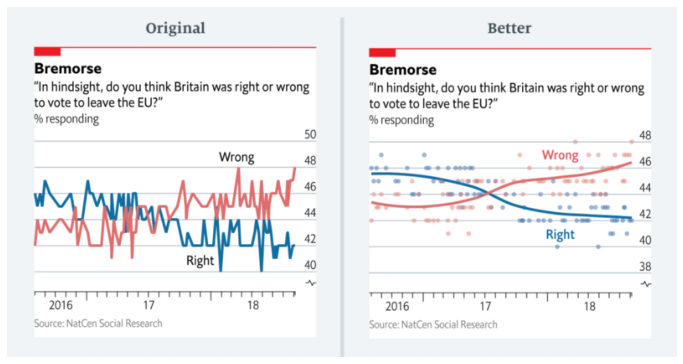

In [2]:
# Show the visualization
file = "visualizations.png"

img = mpimg.imread(file)

fig, ax = plt.subplots(figsize = (12, 12))
ax.imshow(img)
ax.axis("off")
plt.show()

## Verdict visualizations
Based on the image, the right visualization is the better one. Here is why:
1. On the right visualization, there a trend line to see the overall progress of the data, along with scatter points to see possible outliers.
2. The left one is a line plot, whilst the other one is a scatter plot in combination with a trend line. That suits the data overall better to check for progression.
3. The annotations on the right visualization have the colors corresponding to the colors of the data.
4. The transparancy on the right visualization is better, because it doesn't overlap each other, unlike the left visualization.

# Recreation
In this chapter, the two visualizations will be recreated using matplotlib.

In [3]:
# Read the data set
data = pd.read_csv("brexit.csv", header = 3, parse_dates = ['Date'], index_col = 'Date')


# Rename the columns
cols = ['per_response_right', 'per_response_wrong']
data.columns = cols

# Sort by date index
data = data.sort_index()
data.head()

,per_response_right,per_response_wrong
Date,,
2016-02-08,46,42
2016-05-12,44,42
2016-08-17,46,43
2016-08-23,45,43
2016-08-31,47,44


In [8]:
# Set up the parameters

# Figure parameters
ncols = 2
figsize = (16, 7)

# General visualization parameters
xtickslabels = ['2016', '2017', '2018', '2019']
x = data.index
title = "In hindsight, do you think Britain was right or wrong \n to vote to leave the EU?"
ylim = (39, 50)
size = 15
alpha = 0.3
linewidth = 3

# Specific visualization parameters
y1 = data['per_response_right']
y2 = data['per_response_wrong']
xy1 = (pd.Timestamp('2018-03-01'), 39.5)
xy2 = (pd.Timestamp('2018-03-01'), 48.3)
label1 = "Right"
label2 = "Wrong"
color1 = 'blue'
color2 = 'red'

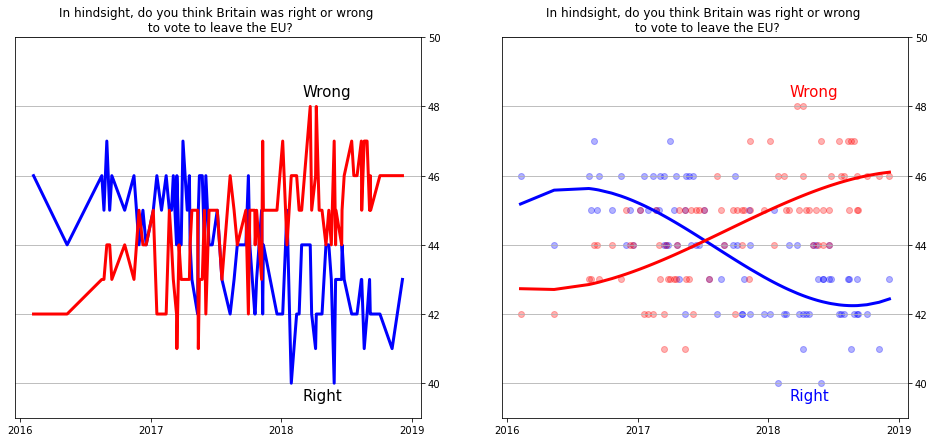

In [9]:
# Set up the figure and axes
fig, ax = plt.subplots(ncols = ncols, figsize = figsize)

# Draw first visualization
ax[0].plot(x, y1, color = color1, linewidth = linewidth)
ax[0].plot(x, y2, color = color2, linewidth = linewidth)
ax[0].set_title(title)
ax[0].set_ylim(ylim)
ax[0].annotate(label1, xy = xy1, size = size)
ax[0].annotate(label2, xy = xy2, size = size)
ax[0].yaxis.set_label_position("right")
ax[0].yaxis.tick_right()
ax[0].set_xticks(xtickslabels)
ax[0].set_xticklabels(xtickslabels)
ax[0].grid(axis = 'y')

# Draw second visualization
ax[1].scatter(x, y1, color = color1, alpha = alpha)
ax[1].scatter(x, y2, color = color2, alpha = alpha)


ax[1].set_title(title)
ax[1].set_ylim(ylim)
ax[1].annotate(label1, xy = xy1, size = size, color = color1)
ax[1].annotate(label2, xy = xy2, size = size, color = color2)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_xticks(xtickslabels)
ax[1].set_xticklabels(xtickslabels)
ax[1].grid(axis = 'y')

# Set polyfit for creating trend line
date = mdates.date2num(data.index)
z_right = np.polyfit(date, y1, 3)
p_right = np.poly1d(z_right)
z_wrong = np.polyfit(date, y2, 3)
p_wrong = np.poly1d(z_wrong)

# Draw trend line on second visualization
ax[1].plot(date, p_right(date), color = color1, linewidth = linewidth)
ax[1].plot(date, p_wrong(date), color = color2, linewidth = linewidth)

# Display both graphs
plt.show()